# Analytic Report and Research Proposal
by: Robert Russ

Decription of the Dataset:

The dataset was derived from: https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data
This dataset is an unidentified auto insurance company's coustomers' information.  The dataset includes 24 variables.  

There are two potential target variables which are customer lifetime value (C.L.V.) and response.  According to Wikipedia, C.L.V. refers to a prediction of the net profit attributed to the entire future relationship with a customer.  This is an important metric for an insurance company because this metric can help the insurance company understand whether customers will stay or find another customer.  Companies make more profit in retaining customers as opposed to getting new customers.  This is called customer churn.  I will propose to do further research on predicting C.L.V. and customer churn later.  

The other target variable is response which refers to customers' response to the company's marketing strategies. One important predictor variable labeled renewal offer type is an attempt by the company to offer their customers a product to keep them.  Another important predictor variable we will consider in this analysis is sales channel.  There are two more important variables we will focus on in the analysis which are vehicle class and vehicle size.  There may be more predictor variables we will explore in relation to the response variables.  

This analysis will focus on the response rate or engagement of the customers.  This analysis will help us determine how effective the company's marketing efforts were to keep the customers engaged.  Some questions we will considers are:

1. What are the relationships among the variables? 
2. What customer attributes lead to higher engagement?
3. Can we predict a customer's engagement rate?

# Loading Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading data into a Pandas dataframe

In [2]:
market_df = pd.read_csv('marketing_customer_value_analysis.csv')

# Displaying the first five rows and column headings.
market_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# Get the shape of the dataset.
# There are 9,134 rows and 24 columns.
market_df.shape

(9134, 24)

# Get information on the columns data types and missing values

In [4]:
# Desciption of the data types of each variable and count of each variable.
# The variables have floating, string, and integer values in them.
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
EmploymentStatus                 9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location Code                    9134 non-null object
Marital Status                   9134 non-null object
Monthly Premium Auto             9134 non-null int64
Months Since Last Claim          9134 non-null int64
Months Since Policy Inception    9134 non-null int64
Number of Open Complaints        9134 non-null int64
Number of Policies               

In [5]:
# Convert the response target variable to a numerical variable.
market_df.Response = (market_df.Response == 'Yes').astype(int)

In [6]:
# Response variable changed from "No" to 0 and "Yes" to 1.
market_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,0,Basic,Bachelor,2/24/2011,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,0,Extended,Bachelor,1/31/2011,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,0,Premium,Bachelor,2/19/2011,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,0,Basic,Bachelor,1/20/2011,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,0,Basic,Bachelor,2/3/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# Summary statistics

In [7]:
# This shows the summary statistics of each numerical variable.
market_df.describe()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,0.143201,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,0.350297,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,0.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,0.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,1.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# Bar graph of counts for the categorical variables

The bar graphs below give a distribution of the important predictor variables before we start our analysis.

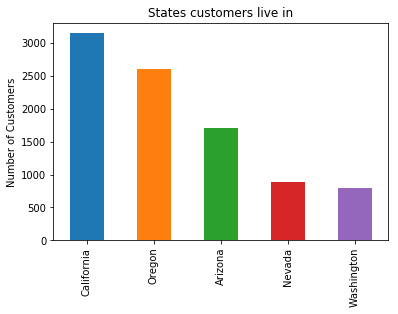

In [8]:
market_df.State.value_counts().plot(kind='bar')
plt.ylabel('Number of Customers')
plt.title('States customers live in')
plt.show()

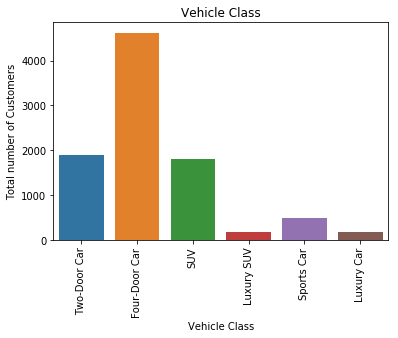

In [9]:
sns.countplot('Vehicle Class', data = market_df)
plt.ylabel('Total number of Customers')
plt.title('Vehicle Class')
plt.xticks(rotation=90)
plt.show()

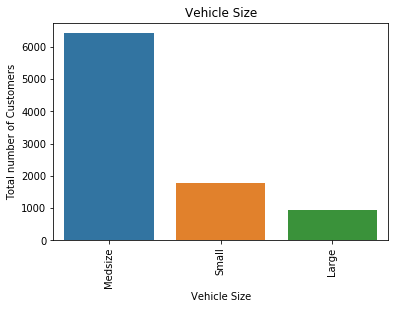

In [10]:
sns.countplot('Vehicle Size', data = market_df)
plt.ylabel('Total number of Customers')
plt.title('Vehicle Size')
plt.xticks(rotation=90)
plt.show()

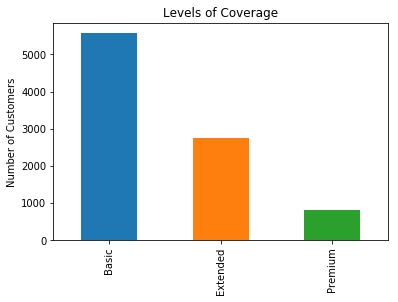

In [11]:
market_df.Coverage.value_counts().plot(kind='bar')
plt.ylabel('Number of Customers')
plt.title('Levels of Coverage')
plt.show()

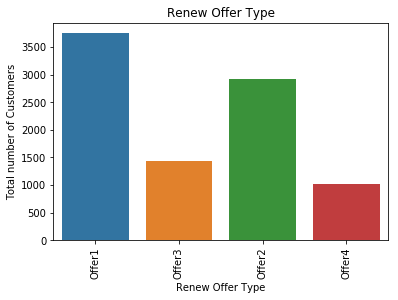

In [12]:
sns.countplot('Renew Offer Type', data = market_df)
plt.ylabel('Total number of Customers')
plt.title('Renew Offer Type')
plt.xticks(rotation=90)
plt.show()

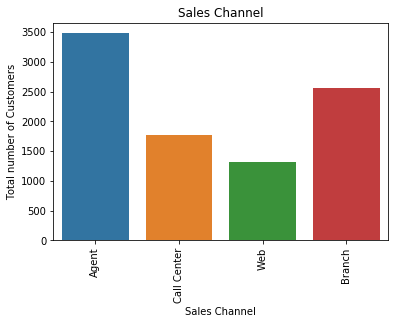

In [13]:
sns.countplot('Sales Channel', data = market_df)
plt.ylabel('Total number of Customers')
plt.title('Sales Channel')
plt.xticks(rotation=90)
plt.show()

Based on the bar graphs above, I can conclude that most of the customers live in California, own midsize four-door cars, have basic coverage, and took renewal offer 1 from an agent.  This data includes customers who respond and did not respond to the marketing efforts of the company. 

# What are the relationships of the predictor variables?  

To answer this question, I checked the correlations among the numerical variables.

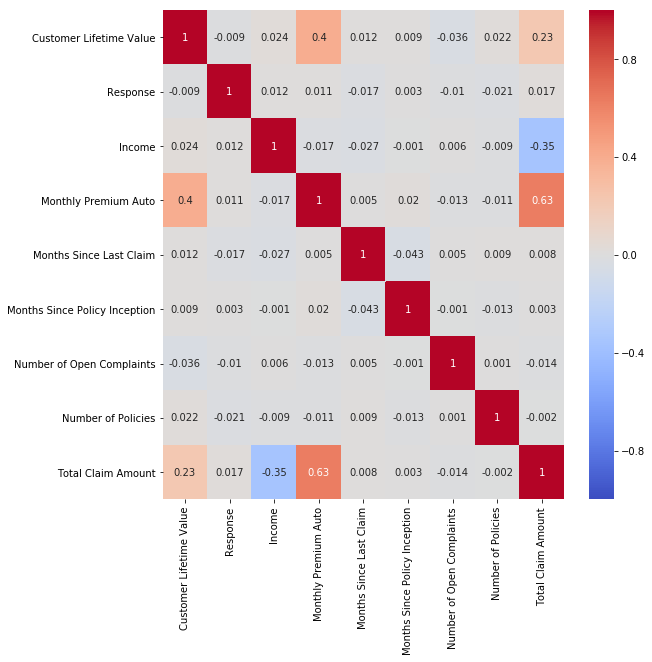

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(round(market_df.corr(), 3),
            vmin=-1,
            cmap='coolwarm',
            annot=True);

According to the correlation matrix above, we can check for multicollinearity.  This is important because when two or more predictor variables are correlated this will affect the results of a model.  There are two variables that have a high positive correlation are total claim amount and monthly premium auto.  Two variables with a moderate negative correlation are total claim amount and income.  The other predictor variables have much lower correlations which means we will not need to take their correlations into account in our model.  

Another observation is there aren't any predictor variables with high correlations to the response target variable.  However, monthly premium auto and total claim amount predictor variables have positive correlation to customer lifetime value.  These correlations will be important to me when I predict customer lifetime value using multivariate linear regression.

# Plotting the two target variables: Customer Lifetime Value and Response

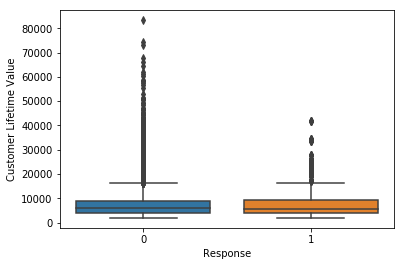

In [15]:
sns.boxplot(x="Response", y="Customer Lifetime Value", data=market_df)
plt.show()

The boxplot above was to see the relationship between the two target variables.  As we can see, the lower a customer's CLV the customers responded to the marketing call.   

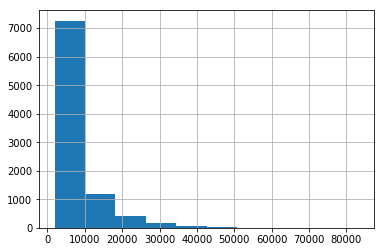

In [16]:
market_df['Customer Lifetime Value'].hist()

The majority of the customers' CLV is below 10,000.

In [27]:
# total number of no and yes.
market_df.groupby('Response').count()['Customer']

Response
0    7826
1    1308
Name: Customer, dtype: int64

In [21]:
# Percent breakdown of the responses of no and yes
(market_df.groupby('Response').count()['Customer']/market_df.shape[0])*100

Response
0    85.679877
1    14.320123
Name: Customer, dtype: float64

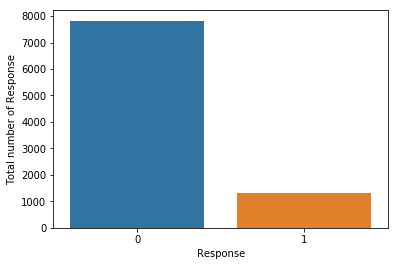

In [17]:
# bar graph of the responses of no and yes.
sns.countplot('Response', data = market_df)
plt.ylabel('Total number of Response')
plt.show()
# percents not bar graphs

Most of the customers did not respond to the marketing call.  This is a concern of the company to figure our why are there so many customers not responding to the marketing efforts?  In order to answer this question, we can investigate the customers that did respond to the marketing efforts.  We can look at the customers' attributes of those who responded to see how we can redesign our marketing calls and renewal offers.  We can also use this information to tailor our marketing efforts to our customers.  We want our customers to stay, so are there products we can offer them that we didn't offer them based on customer's attributes? 

# What customer attributes lead to higher engagement?

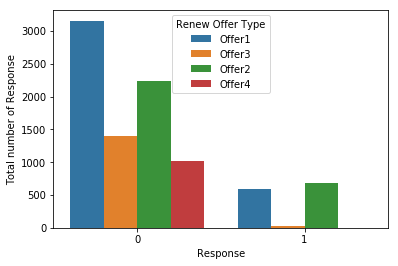

In [22]:
sns.countplot('Response', hue = 'Renew Offer Type' , data = market_df)
plt.ylabel('Total number of Response')
plt.show()

We can see in the bar graph that customers responded more to offer 1 and 2 than offer 3 and 4.  We can focus our attention on using offer 1 and 2 more often and drop offers 3 and 4.  For additional information, we can give customer who chose offer 1 or 2 to tells why they chose that offer.  I think we want to focus our attention in promoting offer 1 and 2 in future marketing calls.

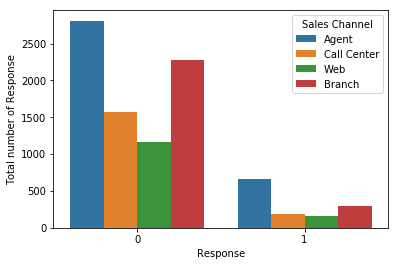

In [23]:
sns.countplot('Response', hue = 'Sales Channel' , data = market_df)
plt.ylabel('Total number of Response')
plt.show()

Customers responded more to their agent's effort to offer them renewal offer 1 and 2.  This is due to agents relationships with their customers, therefore, customers trust their agents more than call centers, web, and branch.  Agents need to be the focal point in marketing efforts in the future.    

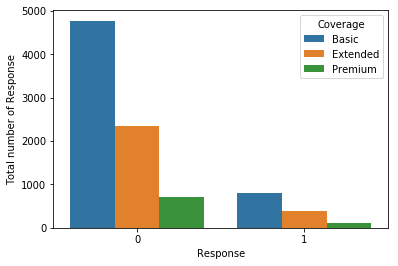

In [24]:
sns.countplot('Response', hue = 'Coverage' , data = market_df)
plt.ylabel('Total number of Response')
plt.show()

Customers with basic coverage responded to marketing efforts more often than customers with premium coverage.

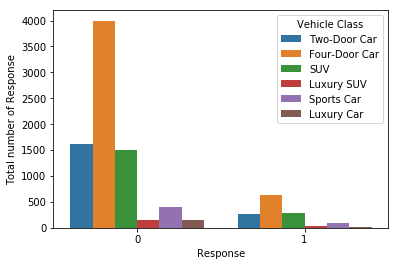

In [25]:
sns.countplot('Response', hue = 'Vehicle Class' , data = market_df)
plt.ylabel('Total number of Response')
plt.show()

Customers with four-door cars responded more than customers with luxury and sports vehicles.

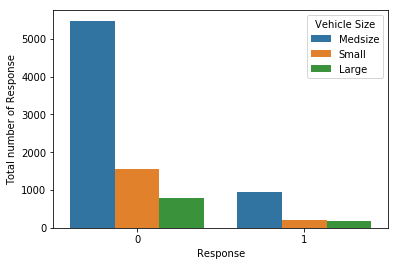

In [26]:
sns.countplot('Response', hue = 'Vehicle Size' , data = market_df)
plt.ylabel('Total number of Response')
plt.show()

With vehicle size, customers with midsize vehicles responded more often than customers with small and large vehicles.

There are some conclusions we can make based on the bar graphs of the customers that responded to the marketing efforts.  People who can afford luxury and sports vehicles with premium coverage do not respond to marketing efforts and people who own four-door medsize cars with basic coverage respond to marketing efforts.  One way to save money will be to place our focus on marketing to people with basic coverage and spend less focus on people with premium coverage.  One can speculate that people with basic coverage want to find a deal, so they will more likely want to hear the company's renewal offers to find the best deal.  

# Can we predict a customer's engagement and CLV?


I want to propose predicting CLV with multivariate linear regression and customer engagement with a random forrest. 